In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Processing and EDA

In [2]:
#read in data
df = pd.read_csv('all_companies_fund.csv') #2000-2019


C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,33,37,955,956,957,962,972,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
all_fund = df.copy()

In [4]:
all_fund.shape

(238121, 988)

In [5]:
print('Total number of unique companies from 2000 - 2019:' , all_fund['GVKEY'].nunique())

Total number of unique companies from 2000 - 2019: 24933


In [6]:
#eliminate private companies (ipodate = nan)
mask = all_fund['ipodate'].isna()
print(mask.sum())
print(all_fund.shape)
print(all_fund[-mask].shape)
all_fund = all_fund[-mask]

144512
(238121, 988)
(93609, 988)


In [7]:
#number of public healthcare companies
print('Total number of unique public companies from 2000 - 2019:', all_fund['GVKEY'].nunique())

Total number of unique public companies from 2000 - 2019: 9714


In [8]:
#eliminate rows with no market cap information
mask = all_fund['mkvalt'].isna()
all_fund = all_fund[-mask]
print('Total number of unique private companies with market cap from 2000 - 2010:', all_fund['GVKEY'].nunique())

Total number of unique private companies with market cap from 2000 - 2010: 8521


In [9]:
all_fund = all_fund.drop_duplicates(['GVKEY', 'fyear'])

In [10]:
# mask= all_fund['stalt']=='TL'
temp = all_fund[['GVKEY', 'fyear', 'stalt']]
temp['temp_year']  = temp['fyear'] -1

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
all_fund = all_fund.drop(columns = 'stalt')

In [12]:
all_fund_bankruptcy = pd.merge(all_fund, temp, left_on = ['GVKEY','fyear'], right_on = ['GVKEY','temp_year'], suffixes = ('_fund', '_temp'), how = 'inner')


In [16]:
all_fund_bankruptcy = all_fund_bankruptcy.drop_duplicates(['GVKEY', 'fyear_fund'])

In [17]:
all_fund_bankruptcy.shape

(75571, 990)

In [22]:
all_fund_bankruptcy['bankrupted'] = np.where( all_fund_bankruptcy['stalt'] == 'TL' , 1,0)


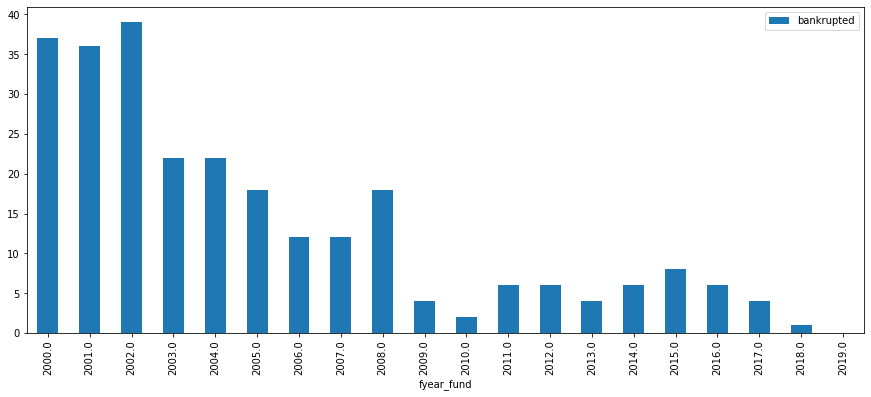

In [24]:
all_fund_bankruptcy.groupby('fyear_fund')[['bankrupted']].sum().plot(kind = 'bar', figsize = (15,6))

In [ ]:
all_fund[all_fund['GVKEY'] == 330942]

In [ ]:
all_fund


In [ ]:
# mask= all_fund['GVKEY']==1164
# all_fund[mask]['datadate']

## Merge fundamental and bankruptcy and financial ratios


In [ ]:
#only keep year end financial ratios for each company
all_fin_ratios=all_fin_ratios.drop_duplicates(subset=['gvkey','qdate'], keep='last')
all_fin_ratios['qmonth']=pd.to_datetime(all_fin_ratios['qdate']).dt.month
mask= all_fin_ratios['qmonth']==12
all_fin_ratios= all_fin_ratios[mask]

all_fin_ratios.shape

In [ ]:
# augument year for fin ratios so its simpler
all_fin_ratios['finyear']=pd.to_datetime(all_fin_ratios['qdate']).dt.year

In [ ]:
# augument year for fundamental to only include year 
all_fund['fundyear']=pd.to_datetime(all_fund['datadate']).dt.year -1 

In [ ]:
all_fin_ratios.head()

In [ ]:
all_fin_ratios.shape

In [ ]:
all_fund.shape

In [ ]:
all_fin_ratios[all_fin_ratios['gvkey'] == 1034]

In [ ]:
all_fund[all_fund['GVKEY'] == 1034]

In [ ]:
fin_ratio_bankruptcy = pd.merge(all_fin_ratios, all_fund, left_on = ['gvkey','finyear'], right_on = ['GVKEY','fundyear'], suffixes = ('_finratio', '_fund'), how = 'right')


In [ ]:
fin_ratio_bankruptcy

In [ ]:
fin_ratio_bankruptcy[fin_ratio_bankruptcy['stalt'] == 'TL']

In [ ]:
fin_ratio_bankruptcy['qdate'].value_counts().sort_index().plot(figsize = (10,6))

In [ ]:
fin_gv = list(all_fin_ratios['gvkey'].unique())

fund_gv = list(all_fund['GVKEY'].unique())

#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in fin_gv:
    
    if i in fund_gv:
        continue
    
    else:
        x.append(i)
        print (i, 'not in fundamental')

In [ ]:
print('Of', len(fin_gv), 'companies with financial ratios', len(x), 'companies are not in fundamental dataset')

In [ ]:
mask = fin_ratio_bankruptcy['stalt']=='TL'
fin_ratio_bankruptcy['bankrupted'] = np.where(mask, 1,0)

In [ ]:
#might want to check why so few bankruptcies exist in this final merge dataset
fin_ratio_bankruptcy['bankrupted'].sum()

In [ ]:
fin_ratio_bankruptcy

In [ ]:
print('The final dataset includes:',fund_ratio_bank['GVKEY'].nunique(), 'companies, which have fundamental as well as financial ratios values, and', fund_ratio_bank['bankrupted'].sum(), 'bankruptcies')

In [ ]:
listcolumns=[]
for i in all_fin_ratios.columns:
    listcolumns.append(i)
print(listcolumns)
listcolumns.pop(1)

In [ ]:
listcolumns

## Final EDA

In [ ]:
#filter for market cap size (in MM)
#recommend using this after creating bankruptcy dummy

def market_cap_size(df, lower, upper):
    
    mask = ((df['mkvalt'] >=lower) & (df['mkvalt'] <=upper))
    df =df[mask]
    
    return df


# #market cap 500M - 1B
# df500 = market_cap_size(fund_ratio_bank, 0,1000)

# df500['GVKEY'].nunique()

In [ ]:
fund_ratio_bank.groupby('year')[['bankrupted']].sum().plot(kind = 'bar', figsize = (15,6))

In [ ]:
final_bank = fund_ratio_bank [fund_ratio_bank['bankrupted']==1]

In [ ]:
final_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

In [ ]:
#bankrupt companies usually have small market caps
final_bank['mkvalt'].plot(kind = 'hist', bins = 200)#.value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))
print('most bankrptcies happened with companies with small market caps')

## Next steps:
1. figure out why so many bankrupted companies do not have fundamental data (is it how the database was constructed? fundamental dataset would get rid of bankrupted or acquired companies?)

2. figure out why only 500 or so bankruptcies exist in the final dataset, down from 1000 (bankrupt companies with fundamental data) --> hypothesis is some fin ratios companies do not have fundamental data and those happen to be the ones with bankrupt data. Need to check 

3. model development. Note that the current dataset includes data from 2000 - 2019. Need to filter out dates
